In [0]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir("/content/drive/Shared drives/CARD/projects/iNDI/line_prioritization/projects_lirong/combined1_hNGN2/scanpy")

In [0]:
# required for umap clustering
! pip3 install leidenalg 
! pip3 install scanpy
# ! pip install python-igraph
# ! pip install louvain
import h5py
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt


In [0]:
sc.settings.verbosity = 3 
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

scanpy==1.4.6 anndata==0.7.1 umap==0.4.0 numpy==1.18.2 scipy==1.4.1 pandas==1.0.3 scikit-learn==0.22.2.post1 statsmodels==0.10.2 python-igraph==0.8.0


In [0]:
%ls scanpy_out/

Combined1_neuron.h5ad


In [0]:
%ls ../vireo/vireo_out/

donor_ids.tsv                  nohup.vireo_12AprilPM2020.log  summary.tsv
fig_GT_distance_estimated.pdf  prob_doublet.tsv.gz
_log.txt                       prob_singlet.tsv.gz


In [0]:
# load the scanpy object which has been analyzed before
adata = sc.read("scanpy_out/combined1_neuron.h5ad")

In [0]:
adata

AnnData object with n_obs × n_vars = 10033 × 2772 
    obs: 'n_genes', 'percent_mito', 'n_counts', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

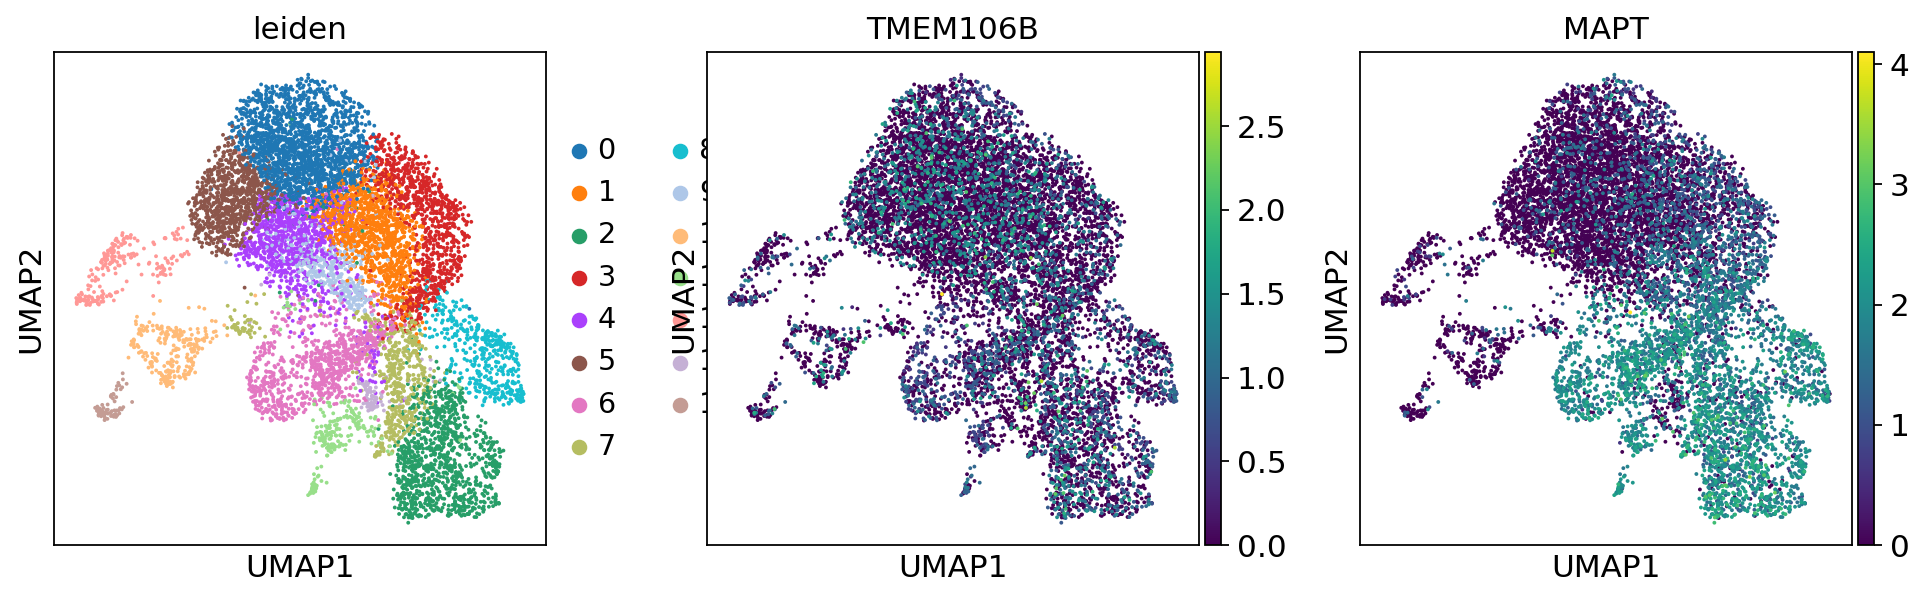

In [0]:
# visualize the umap
sc.pl.umap(adata, color=['leiden', 'TMEM106B','MAPT'], save='Combined1_resolution1_pc50.pdf')

In [0]:
# we can change the numbers of clusters by changing resolution to 0.4 and change the n_pcs
# here i didn't do it because the cluster number of cells don't need to equal to numbers of donors
sc.pp.neighbors(adata, n_neighbors= 20, n_pcs=10)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.4, key_added="leiden_0.3")
sc.tl.leiden(adata, resolution=0.4, key_added = "leiden_0.6")
sc.tl.leiden(adata, resolution=0.4, key_added = "leiden_0.8")

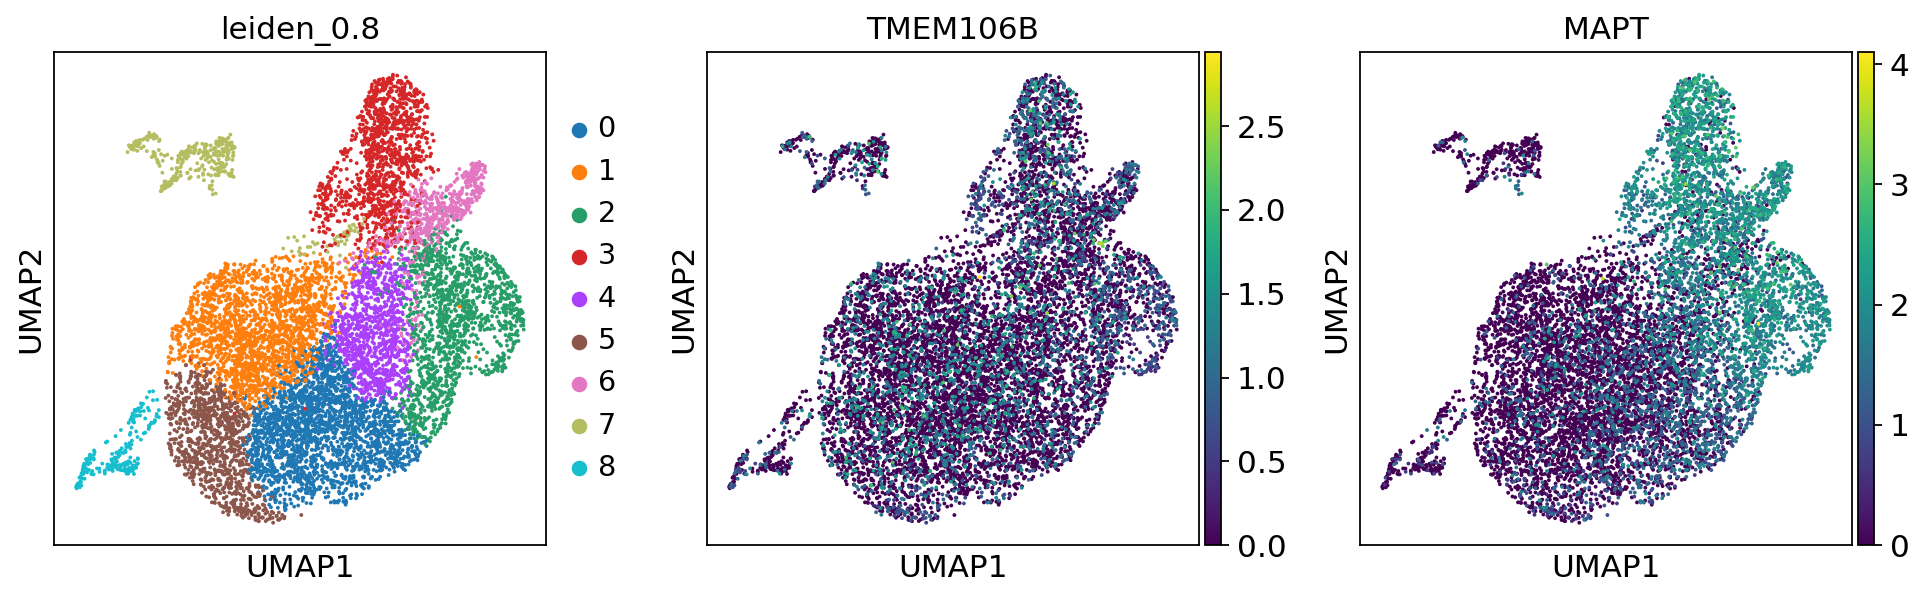

In [0]:
# here is an example showing less clusters when adjusting solution
sc.pl.umap(adata, color=['leiden_0.8', 'TMEM106B','MAPT'], save='Combined1_resolution0.8_pc10.pdf')

In [0]:
# input my donor information from vireo_out
%ls ../vireo/vireo_out/

donor_ids.tsv                  nohup.vireo_12AprilPM2020.log  summary.tsv
fig_GT_distance_estimated.pdf  prob_doublet.tsv.gz
_log.txt                       prob_singlet.tsv.gz


In [0]:
donors= pd.read_csv("../vireo/vireo_out/donor_ids.tsv", '\t', index_col="cell")
donors.head(4)

donor_id  prob_max  ...  best_singlet           best_doublet
cell                                      ...                                     
AAACCCAAGCCATGCC-1  GT19-38447       1.0  ...    GT19-38447  GT19-38447,GT19-38446
AAACCCAAGTAGATCA-1  GT19-38447       1.0  ...    GT19-38447  GT19-38447,GT19-38449
AAACCCACATAATCGC-1  GT19-38447       1.0  ...    GT19-38447  GT19-38447,GT19-38450
AAACCCAGTCAACATC-1  GT19-38447       1.0  ...    GT19-38447  GT19-38447,GT19-38450

[4 rows x 6 columns]

In [0]:
donors_subset = donors[["donor_id"]]
donors_subset["donor_label"]=donors["donor_id"]

In [0]:
# only get the column of interest and add one more for match to meatadata
donors_subset.head()

donor_id donor_label
cell                                      
AAACCCAAGCCATGCC-1  GT19-38447  GT19-38447
AAACCCAAGTAGATCA-1  GT19-38447  GT19-38447
AAACCCACATAATCGC-1  GT19-38447  GT19-38447
AAACCCAGTCAACATC-1  GT19-38447  GT19-38447
AAACCCAGTCGAGATG-1  GT19-38447  GT19-38447

In [0]:
# to get the metadata of the donors
%ls ../../test_vireo/modify_donor/

'Copy of 19-Cel-005 Metadata.xlsx'   test_cell.vcf.gz
 meta_wgs_Psomagen.csv               test_donor_copy.vcf
 sedfnjT29                           test_donor_to_use_small.vcf.gz
 sub_UNHS_2.vcf.gz                   test_donor_to_use.vcf.gz
 sub_UNHS_changed_copy.vcf           test_donor.vcf
 sub_UNHS_changed.vcf                test_donor.vcf.gz
 sub_UNHS_changed.vcf.gz             test_donor.vcf.gz.tbi
 sub_UNHS_changed.vcf.gz.tbi         UNHS_to_use.vcf.gz
 sub_UNHS_filter.vcf.gz              UNHS.vcf.gz
 sub_UNHS.vcf.gz                     UNHS.vcf.gz.csi
 sub_UNHS.vcf.gz.csi                 UNHS.vcf.gz.tbi
 test_cell.vcf


In [0]:
# retrieve the 8 donor's original labels from metadata
meta = pd.read_csv("../../test_vireo/modify_donor/meta_wgs_Psomagen.csv")
meta=meta.loc[:, ["sample_id", "donor_label"]]
meta

sample_id      donor_label
0  GT19-38445  KOLF2-ARID2-A02
1  GT19-38446         KUCG3-C1
2  GT19-38447         NCRM1-C6
3  GT19-38448         NCRM5-C5
4  GT19-38449          PGP1-C2
5  GT19-38450        LNGPI1-C1
6  GT19-38451     NN0003932-C3
7  GT19-38452     NN0004297-C1

In [0]:
# # match donor_id to donor_label
vals_to_replace = {'GT19-38445':'KOLF2-ARID2-A02', 
                   'GT19-38446':'KUCG3-C1', 
                   'GT19-38447':'NCRM1-C6',
                   'GT19-38448':'NCRM5-C5',
                   'GT19-38449':'GT19-38449',
                   'GT19-38450':'LNGPI1-C1',
                   'GT19-38451':'NN0003932-C3',
                   'GT19-38452':'NN0004297-C1'
                   }
                   
donors_subset["donor_label"] = donors_subset["donor_label"].map(vals_to_replace)

In [0]:
donors_subset.head()

donor_id donor_label
cell                                      
AAACCCAAGCCATGCC-1  GT19-38447    NCRM1-C6
AAACCCAAGTAGATCA-1  GT19-38447    NCRM1-C6
AAACCCACATAATCGC-1  GT19-38447    NCRM1-C6
AAACCCAGTCAACATC-1  GT19-38447    NCRM1-C6
AAACCCAGTCGAGATG-1  GT19-38447    NCRM1-C6

In [0]:
adata.obs.head()

n_genes  percent_mito  ...  leiden_0.6 leiden_0.8
AAACCCAAGCCATGCC-1     2441      0.122387  ...           1          1
AAACCCAAGTAGATCA-1     2141      0.100724  ...           0          0
AAACCCACATAATCGC-1     2354      0.049827  ...           6          6
AAACCCAGTCAACATC-1     2330      0.085530  ...           0          0
AAACCCAGTCGAGATG-1     3520      0.094625  ...           2          2

[5 rows x 7 columns]

In [0]:
# note that the row numbers of donor_subset and that of adata are not the same because adata has been filtered for doublets
print("cell numbers in donor_file are:", len(donors_subset))
print("cell numbers in adata are:", len(adata.obs))

cell numbers in donor_file are: 10655
cell numbers in adata are: 10033


In [0]:
# merge two dataframes
adata.obs = adata.obs.merge(donors_subset, left_index=True, right_index=True)
adata.obs.head()

n_genes  percent_mito  ...    donor_id donor_label
AAACCCAAGCCATGCC-1     2441      0.122387  ...  GT19-38447    NCRM1-C6
AAACCCAAGTAGATCA-1     2141      0.100724  ...  GT19-38447    NCRM1-C6
AAACCCACATAATCGC-1     2354      0.049827  ...  GT19-38447    NCRM1-C6
AAACCCAGTCAACATC-1     2330      0.085530  ...  GT19-38447    NCRM1-C6
AAACCCAGTCGAGATG-1     3520      0.094625  ...  GT19-38447    NCRM1-C6

[5 rows x 6 columns]

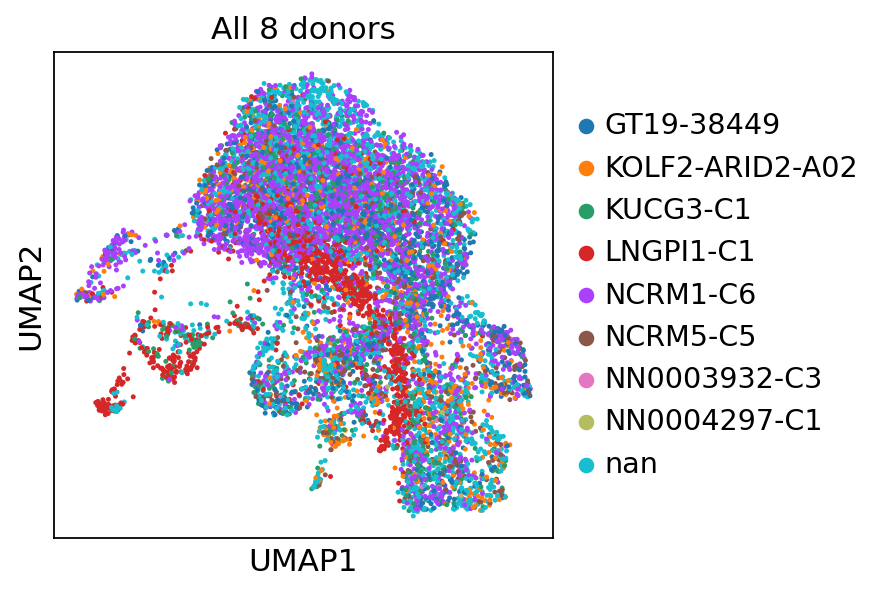

In [0]:
# visualize the cell identify
#plt.rcParams['figure.figsize'] = 4,4
sc.pl.umap(adata, color=['donor_label'], size=20, title="All 8 donors", save='Combined1_donors_labels.pdf')

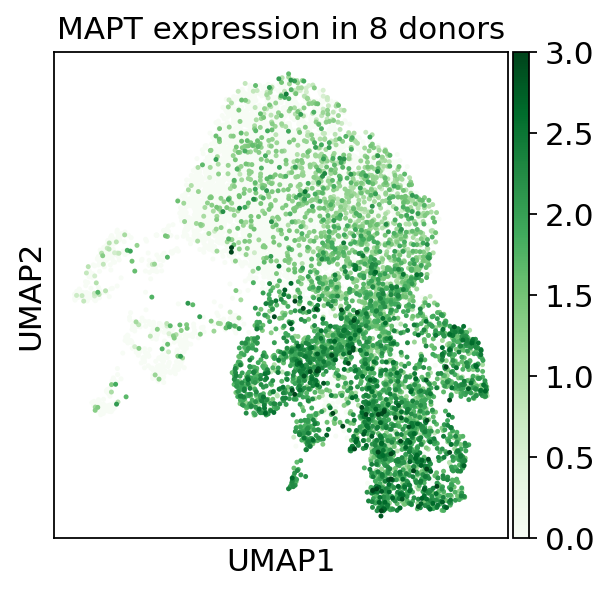

In [0]:
sc.pl.umap(adata, color=['MAPT'], size=20, title="MAPT expression in 8 donors", color_map="Greens", vmin=0, vmax=3)

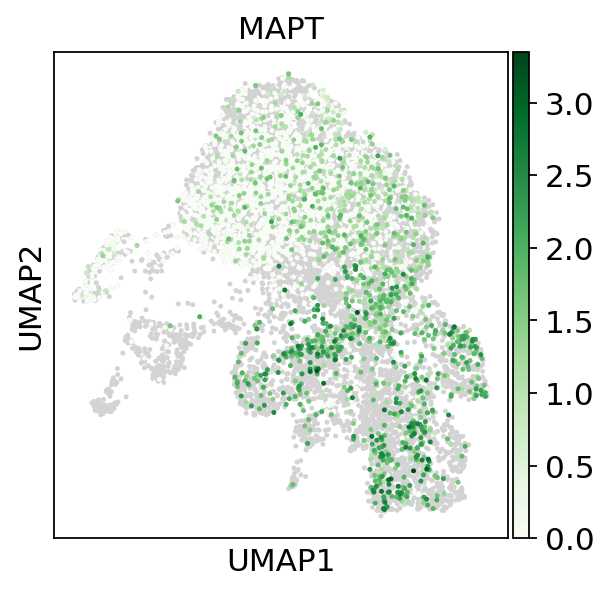

In [0]:
ax = sc.pl.umap(adata, size=20, show=False)
sc.pl.umap(
    adata[adata.obs["donor_label"] == "NCRM1-C6"],
    size=20,
    color=["MAPT"],
    color_map="Greens",
    ax=ax
)

In [0]:
labels = meta["donor_label"].to_list()
labels

['KOLF2-ARID2-A02',
 'KUCG3-C1',
 'NCRM1-C6',
 'NCRM5-C5',
 'PGP1-C2',
 'LNGPI1-C1',
 'NN0003932-C3',
 'NN0004297-C1']

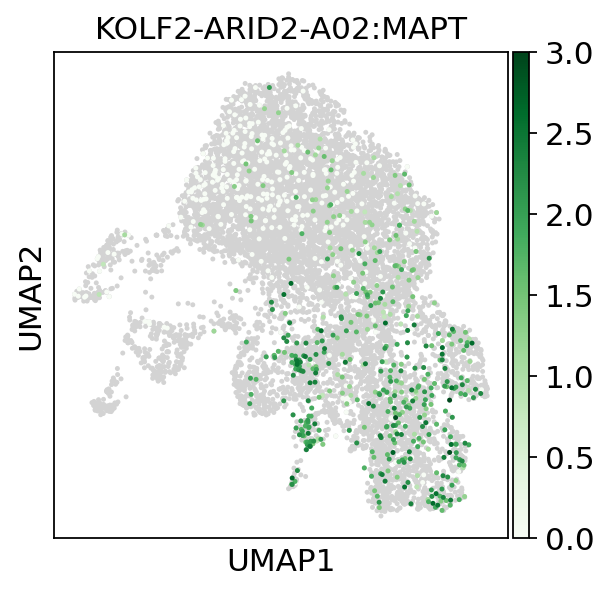

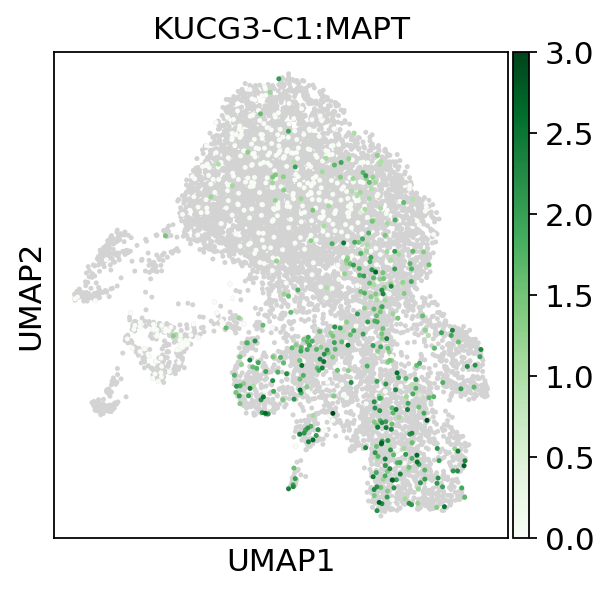

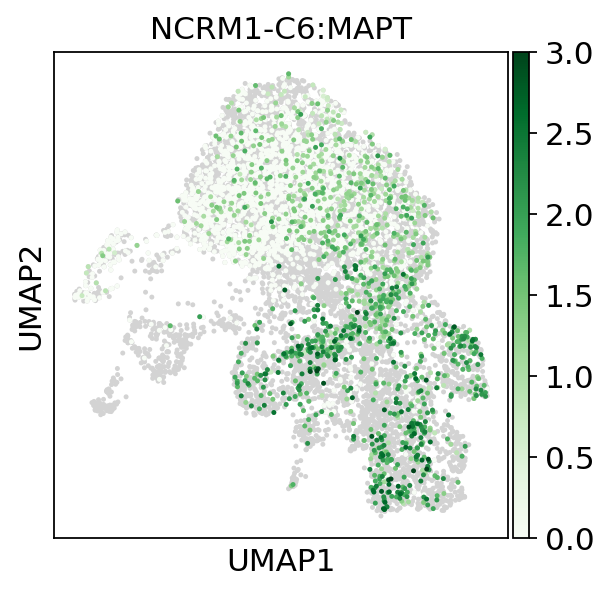

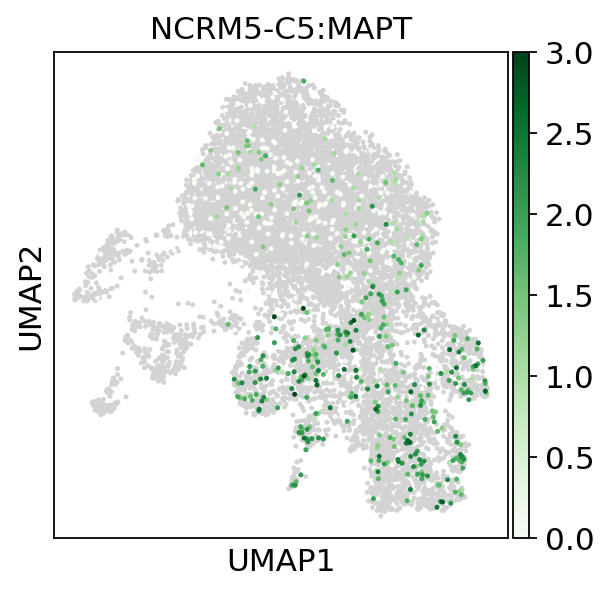

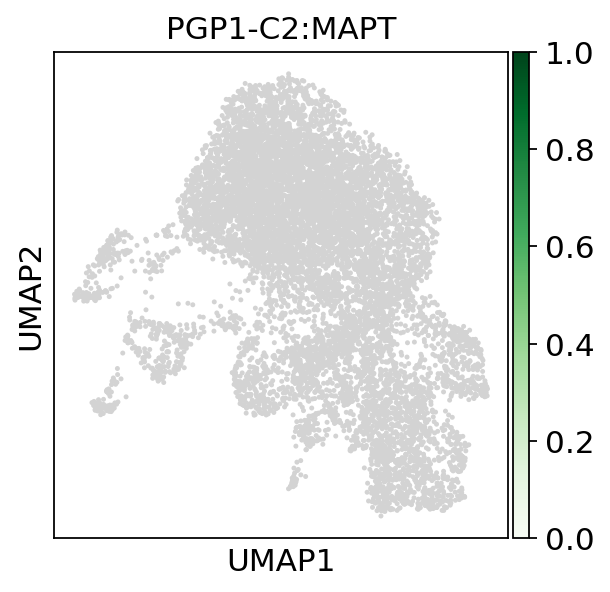

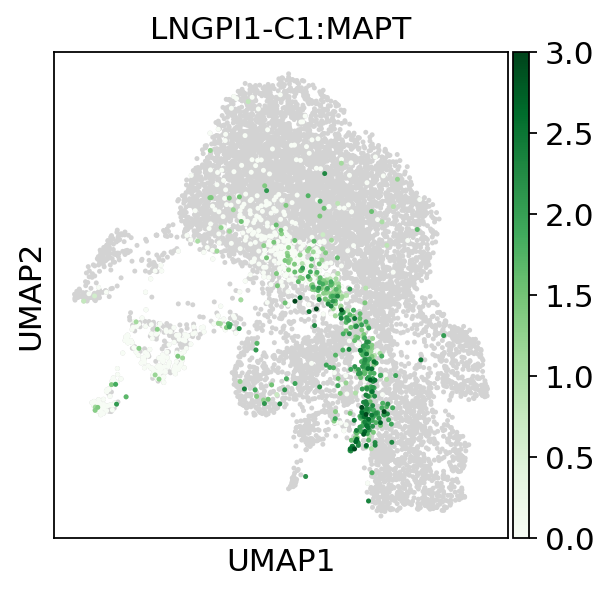

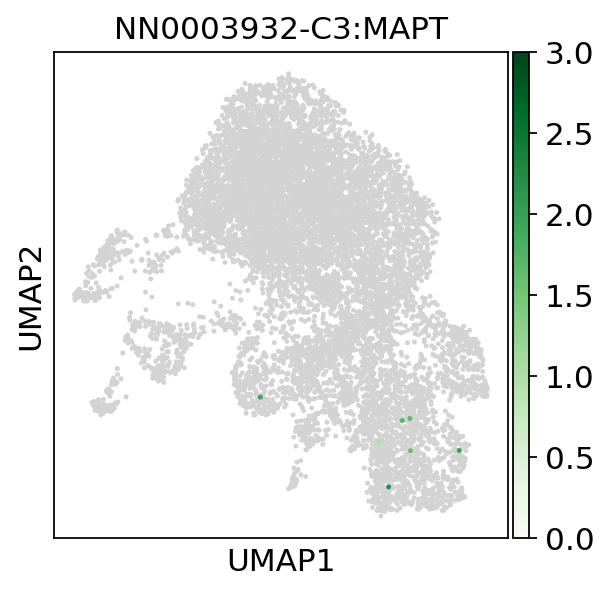

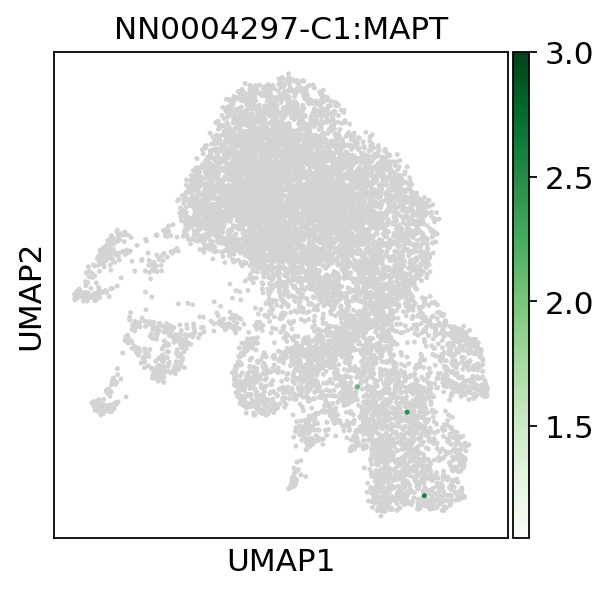

In [0]:
for i in labels:
  ax_title=i+":MAPT"
  ax = sc.pl.umap(adata, size=20, show=False)
  sc.pl.umap(
    adata[adata.obs["donor_label"] == i],
    size=20,
    color=["MAPT"],
    color_map="Greens",
    vmax=3,
    ax=ax, title=ax_title, save=i+".pdf"
  )


In [0]:
%%bash
cd projects_lirong/combined2_hNGN2/scanpy/
mkdir data_for_scanpy/
mv scRNA_Seq_experiment_1_Combined2_hNGN2_outs_filtered_feature_bc_matrix.h5 data_for_scanpy/